In [ ]:
!pip install tensorflow


Examing the Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


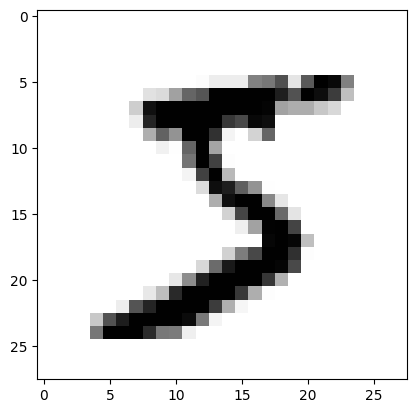

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [ ]:
y_train[0]


5

In [ ]:
y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

One Hot Encoding

In [ ]:
! pip install keras
! pip install np_utils

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
#from tensorflow.python.keras.utils import to_categorical
from keras.utils import to_categorical



In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
#check the shape of the encoded labels.
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [ ]:
y_train_encoded[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

TRAIN NEURAL NETWORK

In [ ]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [ ]:
print(set(x_train_reshaped[0]))


{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


NORMALIZE DATA

In [ ]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [ ]:
#check
print(set(x_train_norm[0]))


{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

Creating the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

TRAINING THE MODEL

In [ ]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 3
)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8189 - loss: 0.6053
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9439 - loss: 0.1915
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.1358


In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9560 - loss: 0.1484
test set accuracy:  96.09000086784363


PREDICTION

In [ ]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
shape of preds:  (10000, 10)


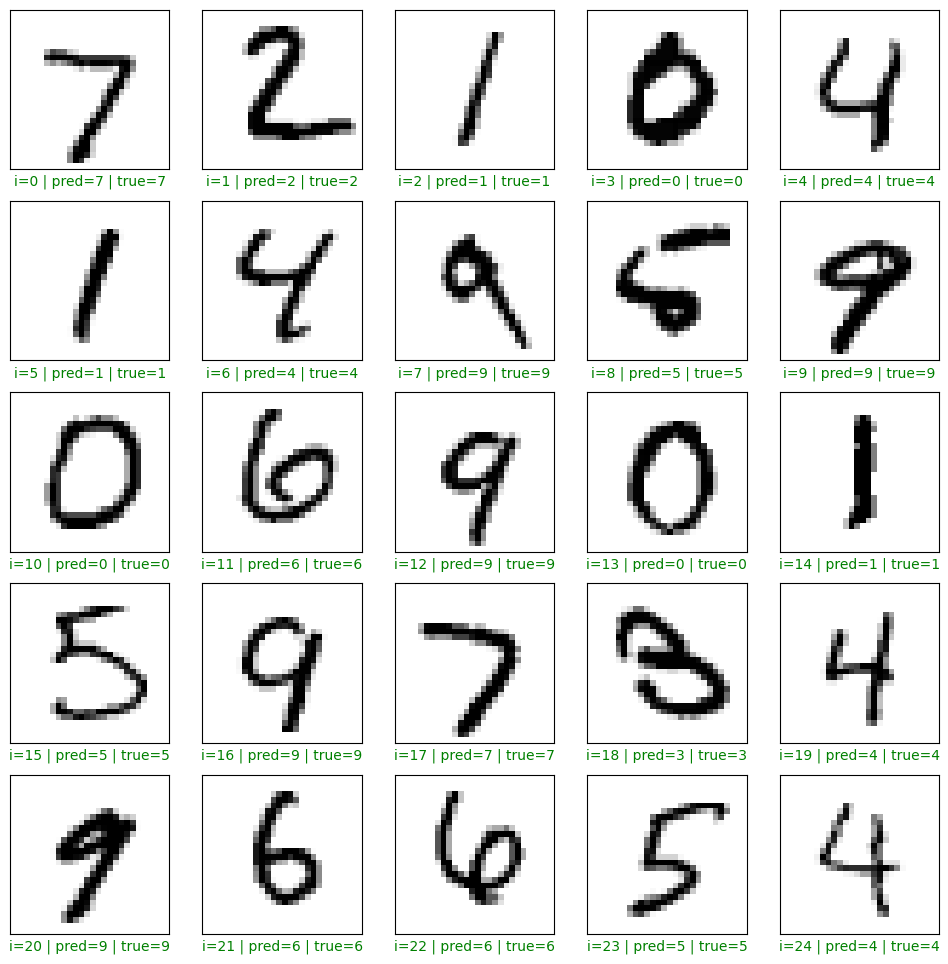

In [ ]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

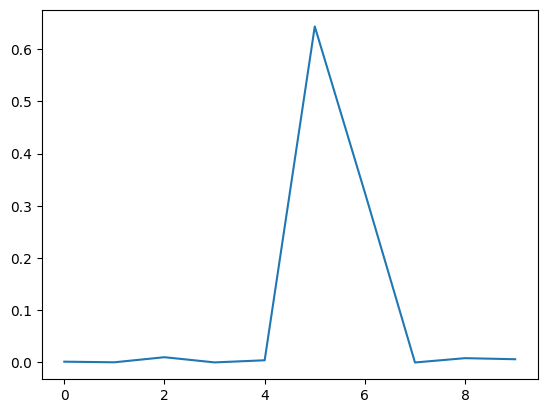

In [ ]:
"""
Enter the index value in place of the value 8 below for the prediction
that you want to plot the probability scores for
"""
index = 8

plt.plot(preds[index])
plt.show()